In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("./datasets/Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [14]:
df.diagnosis_result

0     M
1     B
2     M
3     M
4     M
     ..
95    M
96    B
97    B
98    B
99    M
Name: diagnosis_result, Length: 100, dtype: object

In [15]:
df.shape

(100, 10)

In [16]:
df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [17]:
df.diagnosis_result = df.diagnosis_result.astype('category')
df.dtypes

id                      int64
diagnosis_result     category
radius                  int64
texture                 int64
perimeter               int64
area                    int64
smoothness            float64
compactness           float64
symmetry              float64
fractal_dimension     float64
dtype: object

In [18]:
df['diagnosis_result'].value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [37]:
df = df.drop(labels=['id'], axis=1)
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [39]:
x = df.drop(labels='diagnosis_result', axis=1)
y = df.diagnosis_result

**scipy.stats.zscore**

scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')

Compute the z score.

Compute the z score of each value in the sample, relative to the sample mean and standard deviation.

**Calculation**

If the population mean and population standard deviation are known, a raw score x is converted into a standard score by:

`z = (x-µ) / σ`

In [23]:
from scipy.stats import zscore

scale = x.apply(zscore)  # scaled_x
scale.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [24]:
x.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [25]:
scale.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.969847e-16,-8.437695e-17,-6.911138e-17,2.775558e-17,-1.095235e-15,-1.182388e-16,-1.187384e-15,3.980150e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.617011e+00,-1.399285e+00,-1.900888e+00,-1.574558e+00,-2.246650e+00,-1.457992e+00,-1.899074e+00,-1.441411e+00
25%,-9.990448e-01,-8.186690e-01,-6.061787e-01,-7.108585e-01,-6.335648e-01,-7.594053e-01,-6.911362e-01,-7.015934e-01
50%,3.089829e-02,-1.412833e-01,-1.180096e-01,-1.850942e-01,-5.010859e-02,-1.347862e-01,-1.034909e-01,-2.083819e-01
75%,8.548528e-01,7.780258e-01,7.415925e-01,6.731040e-01,6.363105e-01,4.980515e-01,5.168014e-01,5.314354e-01
max,1.678807e+00,1.697335e+00,3.193050e+00,3.694088e+00,2.764210e+00,3.588272e+00,3.618263e+00,3.983916e+00


In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scale, y, test_size=.3, random_state=2001)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')


In [47]:
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [48]:
y_pred = model.predict(x_test)

In [49]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B']
['B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B']


In [53]:
print("score:", np.around(model.score(x_test, y_test)*100,3),"%")

score: 83.333 %


In [54]:
from sklearn.model_selection import cross_val_score

In [56]:
cross = np.around(cross_val_score(model, scale, y, cv= 10)*100,2) 
cross

array([ 70.,  90., 100., 100.,  80.,  70.,  80.,  70.,  70.,  90.])

In [58]:
print("Average cross val score:", np.around(np.mean(cross),2),"%")

Average cross val score: 82.0 %


In [59]:
from sklearn import metrics

<Axes: >

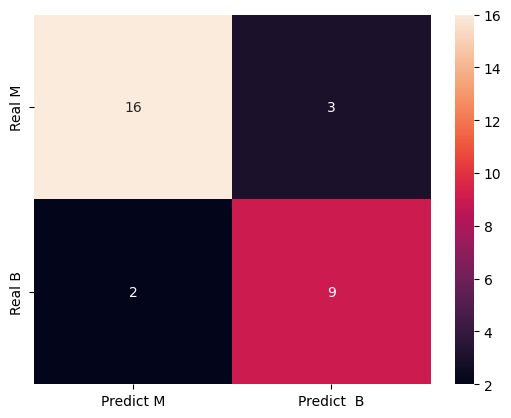

In [60]:
confusion = metrics.confusion_matrix(y_test, y_pred, labels = ["M" , "B"])
confusion_df = pd.DataFrame(confusion, index = ["Real M" , "Real B"], columns = ["Predict M" , "Predict  B"])
sns.heatmap(confusion_df , annot=True)

In [68]:
k = 20
scores = np.zeros(shape=(k))

for n in range(1, k + 1):
    KNNs = KNeighborsClassifier(n_neighbors=n, weights='distance')
    score_n = cross_val_score(KNNs, scale, y, cv=10)
    scores[n-1] = score_n.mean()

scores

array([0.72, 0.72, 0.79, 0.79, 0.82, 0.82, 0.88, 0.86, 0.84, 0.84, 0.85,
       0.85, 0.85, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.84])

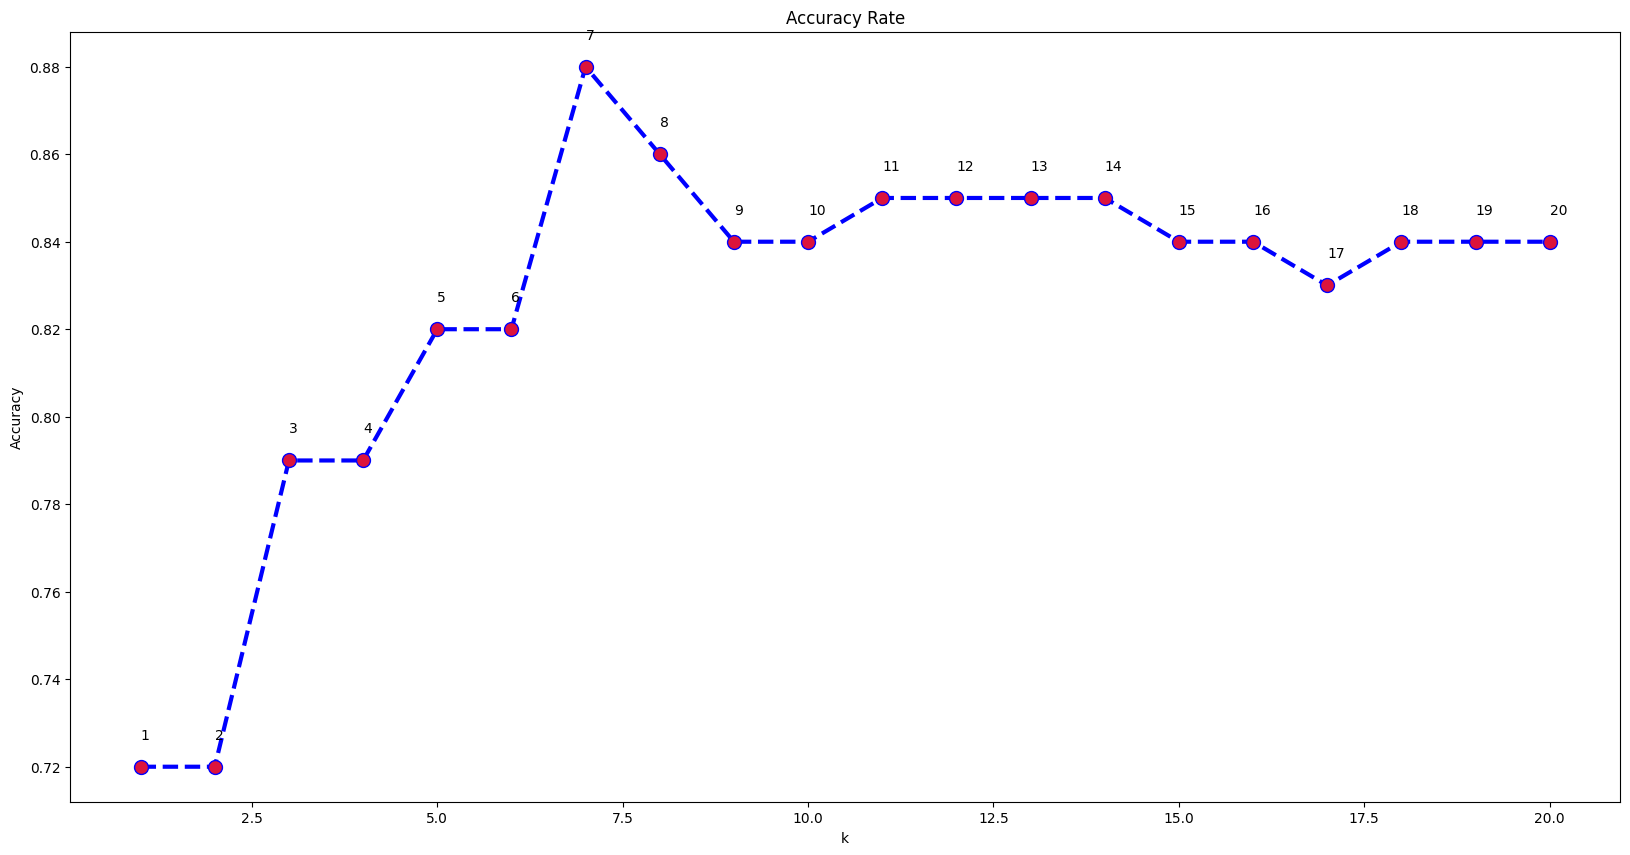

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(range(1, k + 1), scores,
        color='blue', linestyle='dashed', lw=3,
       marker='o', markerfacecolor='crimson', markersize=10)

annotations = [f"{n}" for n in range(1, k + 1)]

for xi, yi, text in zip(range(1, k + 1), scores, annotations):
    ax.annotate(text,
               xy=(xi, yi), xycoords='data', xytext=(0, 20),
               textcoords='offset points')

plt.title('Accuracy Rate')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

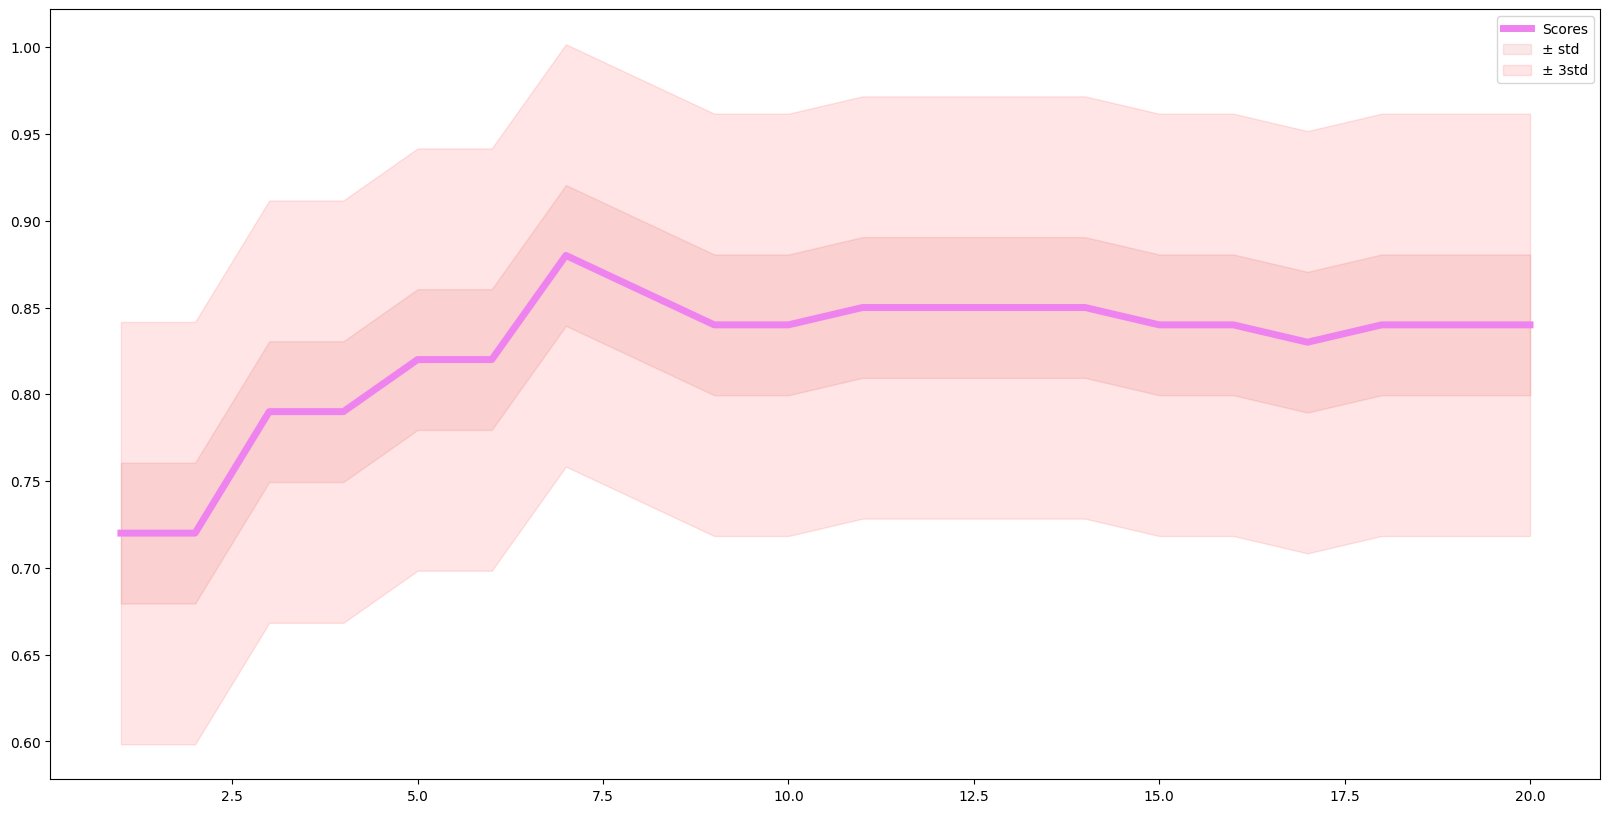

In [70]:
plt.figure(figsize=(20, 10))
accuracy_std = np.std(scores)
plt.plot(range(1, k + 1), scores,
        color='violet', lw=5, label='Scores')
plt.fill_between(range(1, k + 1), scores - accuracy_std, scores + accuracy_std, alpha=0.10, color='tab:red', label='± std')
plt.fill_between(range(1, k + 1), scores - 3*accuracy_std, scores + 3*accuracy_std, alpha=0.10, color='red', label='± 3std')

plt.legend()
plt.show()

In [73]:
new_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
new_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [74]:
print('Score:', np.around(new_model.score(x_test, y_test)*100, 2), '%')

Score: 83.33 %


In [75]:
evaluation = metrics.classification_report(y_test,
                                           new_model.predict(x_test),
                                           labels=['M', 'B'])

print(evaluation)

              precision    recall  f1-score   support

           M       0.89      0.84      0.86        19
           B       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.83        30



**DeNormalize Data**

In [76]:
x = df.drop(labels='diagnosis_result', axis=1)
y = df.diagnosis_result

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=2001)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [81]:
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [82]:
y_pred = model.predict(x_test)

In [98]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B']
['B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B']


In [99]:
print('Score:', np.around(model.score(x_test, y_test)*100, 2), '%')

Score: 80.0 %


In [85]:
cross = np.around(cross_val_score(model, x, y, cv= 10)*100,2) 
cross

array([ 60.,  90.,  90.,  80., 100.,  50.,  80.,  90.,  80., 100.])

In [86]:
print('Average Cross Val Score:', np.around(np.mean(cross), 2), '%')

Average Cross Val Score: 82.0 %


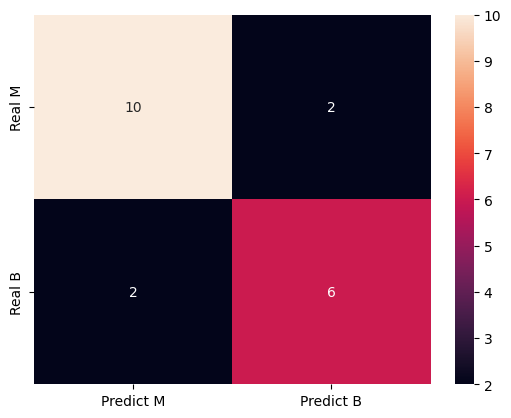

In [87]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred, labels=['M', 'B'])
confusion_df = pd.DataFrame(confusion,
                           index=['Real M', 'Real B'],
                           columns=['Predict M', 'Predict B'])
sns.heatmap(confusion_df, annot=True)
plt.show()

In [88]:
k = 20
scores = np.zeros(shape=(k))

for n in range(1, k + 1):
    KNNs = KNeighborsClassifier(n_neighbors=n, weights='distance')
    score_n = cross_val_score(KNNs, x, y, cv=10)
    scores[n-1] = score_n.mean()

scores

array([0.77, 0.77, 0.78, 0.8 , 0.82, 0.82, 0.83, 0.83, 0.82, 0.8 , 0.81,
       0.81, 0.82, 0.82, 0.83, 0.83, 0.83, 0.82, 0.83, 0.82])

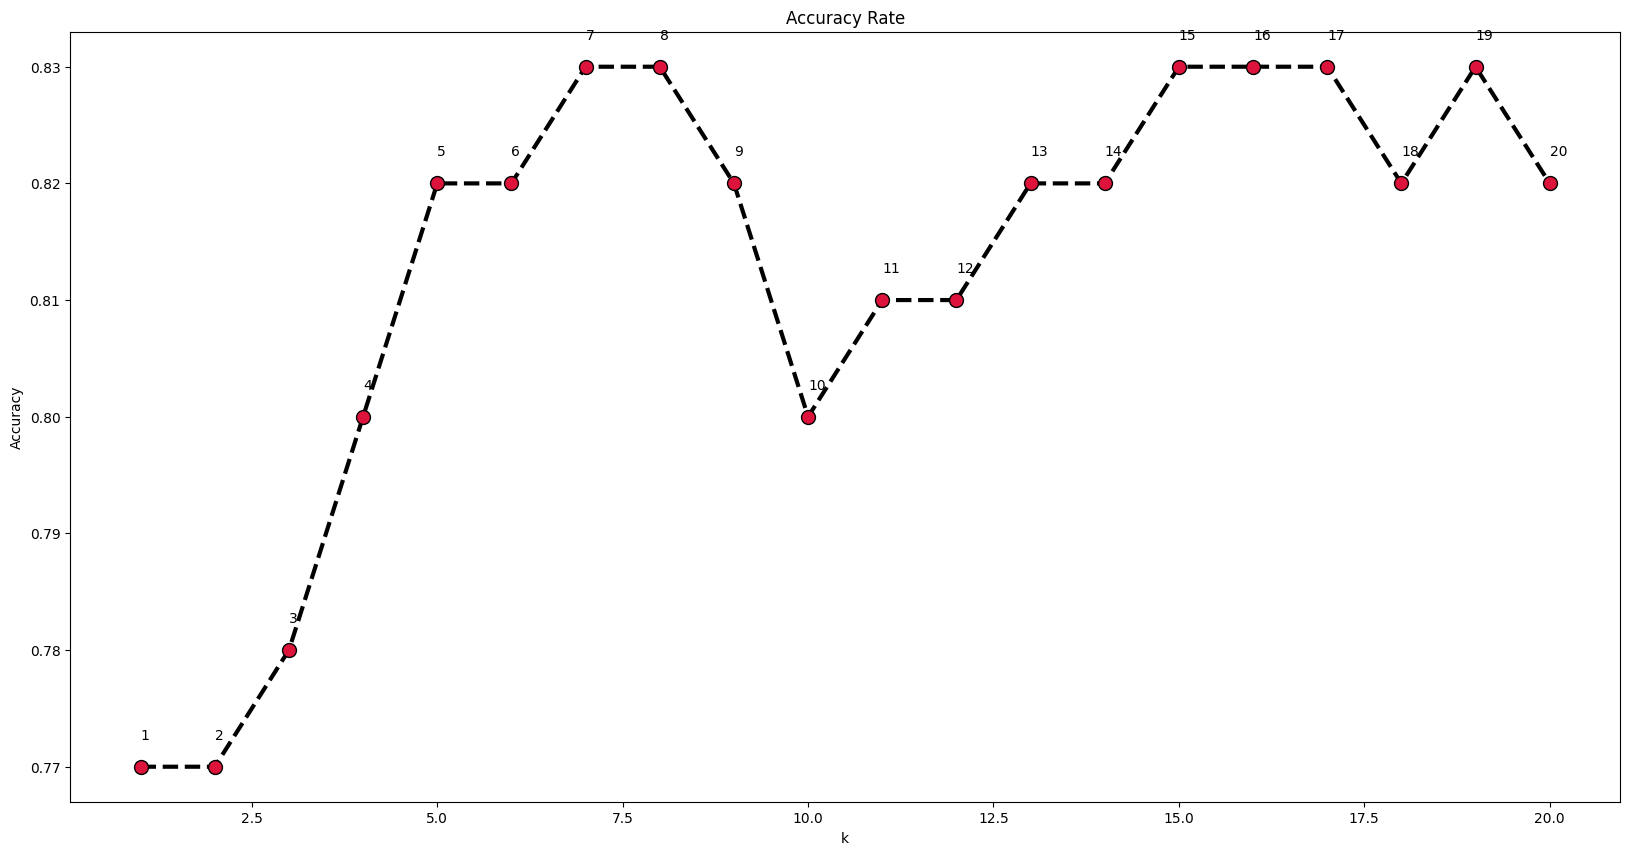

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(range(1, k + 1), scores,
        color='k', linestyle='dashed', lw=3,
       marker='o', markerfacecolor='crimson', markersize=10)

annotations = [f"{n}" for n in range(1, k + 1)]

for xi, yi, text in zip(range(1, k + 1), scores, annotations):
    ax.annotate(text,
               xy=(xi, yi), xycoords='data', xytext=(0, 20),
               textcoords='offset points')

plt.title('Accuracy Rate')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

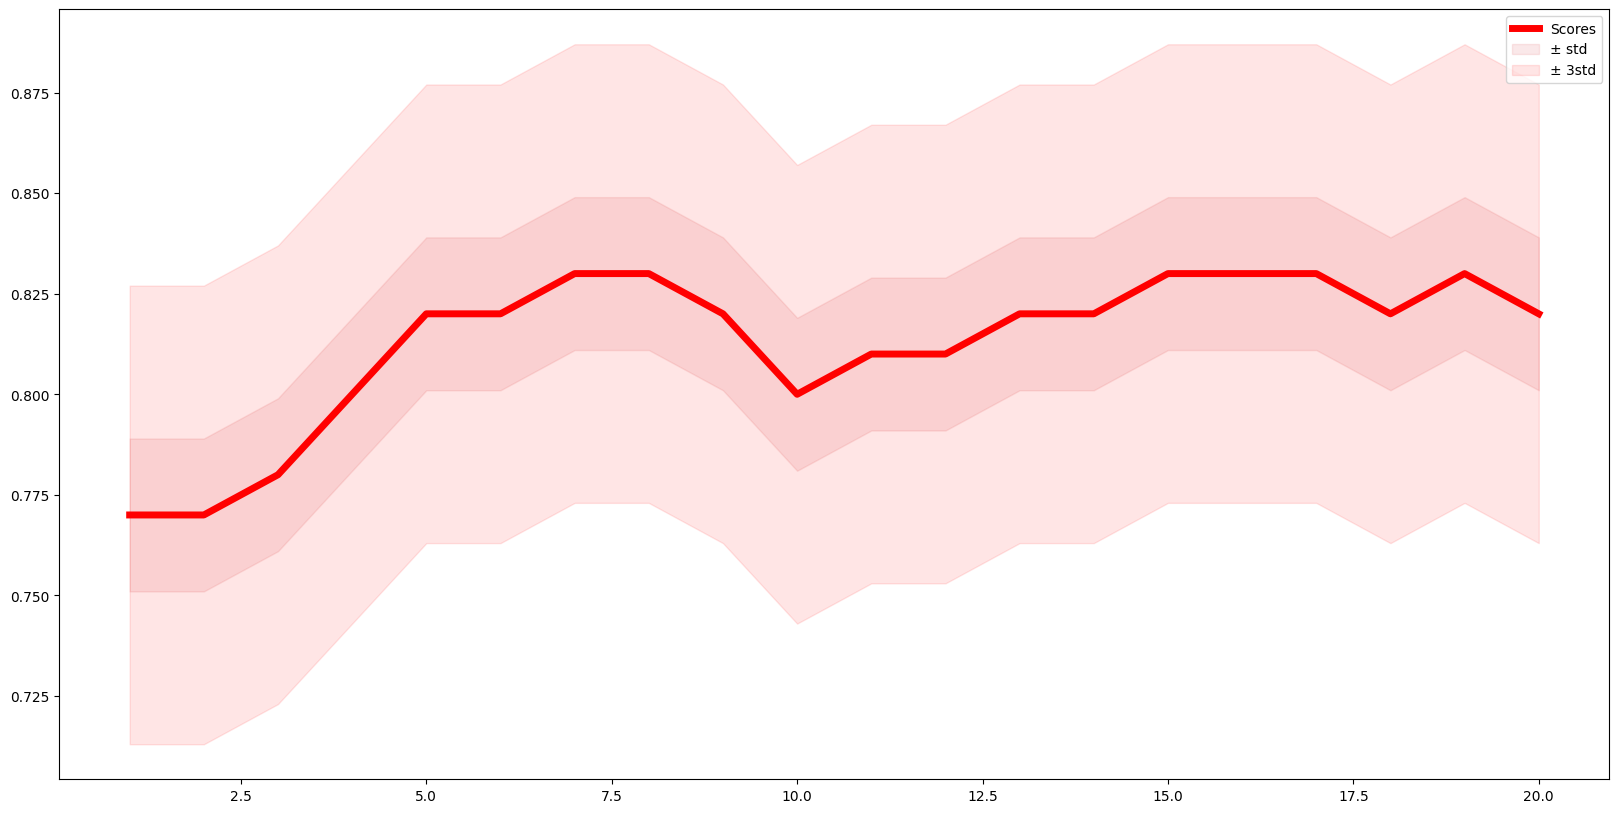

In [90]:
plt.figure(figsize=(20, 10))
accuracy_std = np.std(scores)
plt.plot(range(1, k + 1), scores,
        color='red', lw=5, label='Scores')
plt.fill_between(range(1, k + 1), scores - accuracy_std, scores + accuracy_std, alpha=0.10, color='tab:red', label='± std')
plt.fill_between(range(1, k + 1), scores - 3*accuracy_std, scores + 3*accuracy_std, alpha=0.10, color='red', label='± 3std')

plt.legend()
plt.show()

In [94]:
from sklearn.metrics import f1_score, recall_score, precision_score
f1_score(y_test, y_pred, average='macro')

0.7916666666666667

In [96]:
precision_score(y_test, y_pred, average='weighted')

0.8